In [1]:
import os, time, copy
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.models as vmodels
import torchvision.datasets as vdatasets

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as pil_image

import numpy as np
from skimage.transform import resize

torch.manual_seed(42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
net = vmodels.resnet50(pretrained=True)
net.eval()
net.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [16]:
test_transforms = transforms.Compose([
        transforms.Resize(197),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

cls2name = {0: '안철수', 1: '홍준표', 2:'문재인', 3:'심상정', 4:'유승민'}
cls2color = {0: 'green', 1: 'red', 2:'blue', 3:'yellow', 4:'teal'}

In [9]:
def run_inference(img_path, is_heatmap=False, save=False, save_dir=None):
    img = pil_image.open(img_path)
    img_array = np.asarray(img)[:, :, :3]
    n_H, n_W, n_C = img_array.shape
    
    to_feed = copy.deepcopy(img_array)
    inp_tensor = test_transforms(to_feed).unsqueeze(0).float()
    inp_tensor = inp_tensor.to(device)
    print(inp_tensor.size())
    output, features = net(inp_tensor)
    return output, features

In [11]:
img_path = "tabby.jpg"
img = pil_image.open(img_path)
img_array = np.asarray(img)[:, :, :3]
n_H, n_W, n_C = img_array.shape

to_feed = copy.deepcopy(img_array)
inp_tensor = test_transforms(to_feed).unsqueeze(0).float()
inp_tensor = inp_tensor.to(device)

In [24]:
inp_tensor = test_transforms(pil_image.open("tabby.jpg")).unsqueeze(0)

In [25]:
inp_tensor.size()

torch.Size([1, 3, 197, 197])

In [32]:
F.sigmoid(net(inp_tensor)).sort(descending=True)

(tensor([[ 0.9999,  0.9999,  0.9999,  0.9998,  0.9997,  0.9995,  0.9994,
           0.9993,  0.9992,  0.9984,  0.9980,  0.9979,  0.9977,  0.9974,
           0.9972,  0.9969,  0.9960,  0.9957,  0.9954,  0.9954,  0.9953,
           0.9949,  0.9946,  0.9946,  0.9945,  0.9935,  0.9931,  0.9913,
           0.9912,  0.9906,  0.9900,  0.9900,  0.9894,  0.9893,  0.9885,
           0.9875,  0.9854,  0.9852,  0.9848,  0.9846,  0.9843,  0.9842,
           0.9820,  0.9819,  0.9814,  0.9813,  0.9800,  0.9795,  0.9790,
           0.9772,  0.9757,  0.9748,  0.9739,  0.9732,  0.9731,  0.9723,
           0.9715,  0.9708,  0.9694,  0.9687,  0.9660,  0.9648,  0.9627,
           0.9614,  0.9594,  0.9584,  0.9563,  0.9546,  0.9532,  0.9523,
           0.9517,  0.9505,  0.9481,  0.9477,  0.9472,  0.9456,  0.9451,
           0.9449,  0.9441,  0.9428,  0.9425,  0.9417,  0.9408,  0.9405,
           0.9402,  0.9401,  0.9378,  0.9376,  0.9366,  0.9356,  0.9343,
           0.9323,  0.9322,  0.9317,  0.9306,  0.92

In [44]:
np.round(F.softmax(net(inp_tensor), dim=1).sort(descending=True)[0].detach().numpy(), 3)

array([[0.221, 0.216, 0.168, 0.079, 0.061, 0.033, 0.027, 0.022, 0.02 ,
        0.01 , 0.008, 0.008, 0.007, 0.006, 0.006, 0.005, 0.004, 0.004,
        0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002,
        0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
      

In [41]:
np.round(F.softmax(net(inp_tensor), dim=1).sort(descending=True)[0].detach().numpy(), 2)

array([[0.22, 0.22, 0.17, 0.08, 0.06, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 

In [35]:
np.round(F.softmax(net(inp_tensor), dim=1).detach().numpy(), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 

In [10]:
output, features = run_inference("tabby.jpg")

torch.Size([1, 3, 227, 227])


RuntimeError: size mismatch, m1: [1 x 8192], m2: [2048 x 1000] at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/aten/src/TH/generic/THTensorMath.c:2033

In [52]:
np.round(np.exp((F.log_softmax(output, dim=1)[0, :, 0, 0]).detach().numpy()), 2)

array([0.17, 0.  , 0.81, 0.  , 0.01], dtype=float32)

In [55]:
F.sigmoid(output[0, :, 0, 0])

tensor([ 0.9393,  0.1039,  0.9864,  0.0229,  0.5017])

In [8]:
img_path = "samples/moon3.JPG"
cls = 2


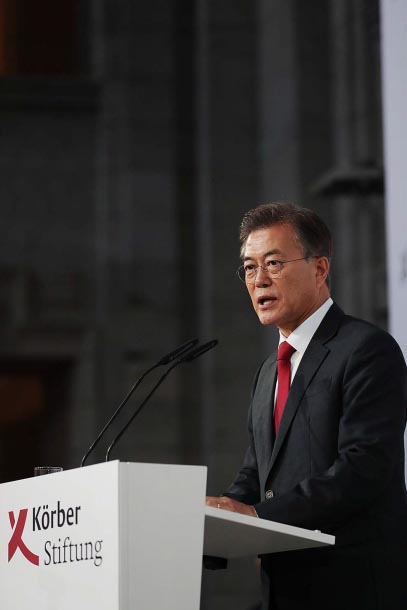

In [9]:
pil_image.open(img_path)

In [10]:
img = pil_image.open(img_path)
img_array = np.asarray(img)

In [250]:
def pad_image(vimg_array):
    h, w = vimg_array.shape[:2]
    
    if h == w:
        print("no padding needed")
        return vimg_array / 255., (h, w)
    elif h > w:
        print("padding left and right")
        pad_length = int((h - w) / 2)
        pad_left = np.zeros((h, pad_length,  3))
        pad_right = np.zeros((h, pad_length,  3))
        padded = np.hstack((pad_left, vimg_array, pad_right))
        padded_resized = resize(padded, (h, h)) / 255.
        return padded_resized, (h, h)
    elif w > h:
        print("padding up and bottom")
        pad_length = int((w - h) / 2)
        pad_up = np.zeros((pad_length, w, 3))
        pad_bottom = np.zeros((pad_length, w, 3))
        padded = np.vstack((pad_up, vimg_array, pad_bottom))
        padded_resized = resize(padded, (w, w)) / 255.
        return padded_resized, (w, w)
        
        
padded_image, (h, w) = pad_image(img_array)

padding left and right


/Users/jastills/anaconda3/envs/pytorch/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/jastills/anaconda3/envs/pytorch/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


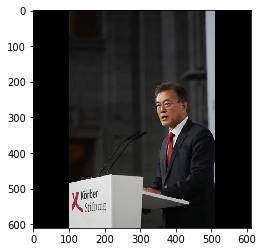

In [251]:
plt.imshow(padded_image)

In [252]:
test_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [253]:
to_feed = copy.deepcopy(padded_image)
inp_tensor = test_transforms(to_feed).unsqueeze(0).float()
inp_tensor = inp_tensor.to(device)

In [254]:
output, features = net(inp_tensor)

In [255]:
max_label = torch.max(F.softmax(output[0], dim=0), dim=0)[1].int()

In [256]:
max_label

tensor([[ 2,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  4],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  4],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  2],
        [ 2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  2],
        [ 2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  4],
        [ 2,  2,  2,  0,  4,  4,  1,  1,  1,  1,  1,  1,  1,  4],
        [ 2,  2,  2,  0,  4,  4,  1,  1,  1,  1,  1,  1,  4,  0],
        [ 2,  2,  0,  0,  4,  4,  4,  4,  4,  4,  4,  0,  0,  0],
        [ 2,  2,  0,  0,  4,  4,  4,  4,  4,  0,  0,  0,  0,  2]], dtype=torch.int32)

In [257]:
thres = (torch.max(F.softmax(output[0], dim=0), dim=0)[0] < 0.6)

In [258]:
max_label.masked_fill(thres, -1)

tensor([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  2, -1, -1, -1],
        [-1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1],
        [-1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1],
        [-1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1],
        [-1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1],
        [-1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1],
        [-1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1],
        [-1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  1,  1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]], dtype=torch.int32)

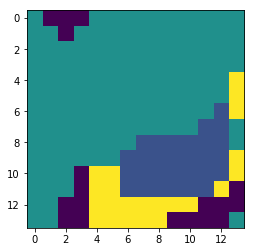

In [259]:
plt.imshow(torch.max(F.softmax(output[0], dim=0), dim=0)[1].detach().numpy())

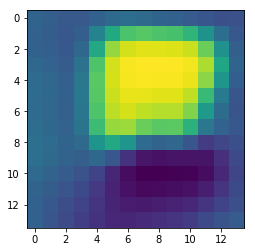

In [260]:
plt.imshow(F.softmax(output[0], dim=0)[cls, :, :].detach().numpy())

/Users/jastills/anaconda3/envs/pytorch/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/jastills/anaconda3/envs/pytorch/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


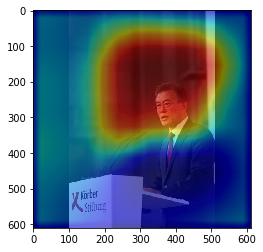

In [261]:
plt.imshow(padded_image)
plt.imshow(resize((F.softmax(output[0], dim=0)[cls]).detach().numpy(), (h, w)), alpha=0.5, cmap='jet')

In [262]:
s = features.size()[3]

In [263]:
sl = s-7+1

In [264]:
W_conv = net.classifier_layer.last_conv.weight.detach()
W_conv_c = W_conv[cls]

In [265]:
A_conv_c = torch.zeros(1, s, s)
for i in range(sl):
    for j in range(sl):
        a_conv_c = (features[:, :, i:i+7, j:j+7] * W_conv_c).sum(1)
        A_conv_c[:, i:i+7, j:j+7] = torch.max(A_conv_c[:, i:i+7, j:j+7], a_conv_c)
_min = A_conv_c.min(-1, keepdim=True)[0].min(-2, keepdim=True)[0]
_max = A_conv_c.max(-1, keepdim=True)[0].max(-2, keepdim=True)[0]
A_conv_c_normalized = (A_conv_c - _min) / (_max - _min)

/Users/jastills/anaconda3/envs/pytorch/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/jastills/anaconda3/envs/pytorch/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


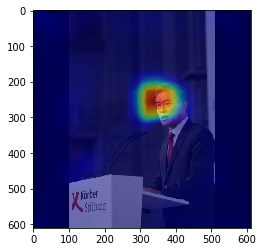

In [266]:
plt.imshow(padded_image)
plt.imshow(resize(A_conv_c_normalized[0].detach().numpy(), (h, w)), cmap='jet', alpha=0.5)